In [1]:
import cv2
import numpy as np
import keras 
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

In [23]:
from matplotlib import pyplot as plt

In [48]:
with open('example_model.json', 'r') as f:
    loaded_model = model_from_json(f.read())
    
loaded_model.load_weights('ex_weights.h5')

In [25]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()


X_train_L = X_train.reshape(60000, 784).astype('float32')
X_valid_L = X_valid.reshape(10000, 784).astype('float32')

X_train_L /=255
X_valid_L /= 255 

y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)


313/313 [==============================] - 1s 1ms/step
0.99760026 ==> 1.0 ==> 0
3.1668128e-06 ==> 0.0 ==> 1
0.0013019855 ==> 0.0 ==> 2
1.7487444e-05 ==> 0.0 ==> 3
3.2964095e-07 ==> 0.0 ==> 4
0.0008569592 ==> 0.0 ==> 5
0.00014849336 ==> 0.0 ==> 6
4.2547224e-05 ==> 0.0 ==> 7
2.0375832e-05 ==> 0.0 ==> 8
8.385519e-06 ==> 0.0 ==> 9


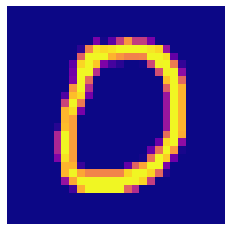

In [26]:
load_test  = loaded_model.predict(X_valid_L)
for ind, pr in enumerate(load_test[10]):
    print(pr, y_valid[10][ind], ind, sep=' ==> ')
    
plt.imshow(X_valid[ 10], cmap='plasma')
plt.axis('off')

plt.show()

## Это пример

In [122]:
with open('example_model.json', 'r') as f:
    loaded_model = model_from_json(f.read())
    
loaded_model.load_weights('ex_weights.h5')

## А тут начинается моя рисовалка


In [124]:
global X_in
X_in = np.zeros((28,28), dtype=np.uint8() )

bcolor = np.array([255, 0, 0], dtype=np.uint8())
cnv = np.ones((560, 560, 3), dtype=np.uint8()) * bcolor 



In [125]:
def draw(event, x,y, flags, param):
    #print('event=',event,'x=', x,'y=', y,'flags=', flags,'param=', param)
    global X_in
    power = 80

    # для массива входных данных    
    y_ = y // 28
    x_ = x // 28


    # добавляем 1, чтобы не закрашивать сетку (мы сдвинули на 1)
    
    y = y - y%20+1
    x = x - x%20+1

    # left click
    if flags == 1:
        # добавляем 19, чтобы не закрашивать сетку, но с другой стороны (мы уже добавили 1)
        #B
        if cnv[y, x, 0 ] - power > 0:
            cnv[y: y+19, x:x+19, 0 ] -= power 
        else:
            cnv[y: y+19, x:x+19, 0 ] = 0  
        #G
        if cnv[y, x, 1 ] + power < 255:
            cnv[y: y+19, x:x+19, 1 ] += power
        else:
            cnv[y: y+19, x:x+19, 1 ] = 255
        #R
        if cnv[y, x, 2 ] + power < 255:
            cnv[y: y+19, x:x+19, 2 ] += power 
        else:
            cnv[y: y+19, x:x+19, 2 ] = 255
            
        # data
        if X_in[y_, x_ ] + power < 255:
            X_in[y_, x_] += power 
        else:
            X_in[y_, y_ ] = 255
            
    # right click
    elif flags == 2:
        #B
        if cnv[y, x, 0 ] + power < 255:
            cnv[y: y+19, x:x+19, 0 ] += power
        else:
            cnv[y: y+19, x:x+19, 0 ] = 255
        #G
        if cnv[y, x, 1 ] - power > 0:
            cnv[y: y+19, x:x+19, 1 ] -= power
        else:
            cnv[y: y+19, x:x+19, 1 ] = 0
        #R
        if cnv[y, x, 2 ] - power > 0:
            cnv[y: y+19, x:x+19, 2 ] -= power 
        else:
            cnv[y: y+19, x:x+19, 2 ] = 0
        # data
        if X_in[y_, x_ ] - power > 0:
            X_in[y_, x_] -= power 
        else:
            X_in[y_, y_ ] = 0

    # проверяем по зеленому каналу
    #X_in [y_, x_] =  cnv[y, x, 1 ]
    #print(X_in.shape)
    X_in_L = X_in.astype("float32") / 255
    X_in_L = np.expand_dims(X_in_L, -1)
    print(X_in_L.shape)
    if event == 4:
        load_test  = loaded_model.predict(X_in_L )    
        #for ind, pr in enumerate(load_test [0]):
        #    print( pr, ind, sep=' ==> ')
'''
        X_in = X_in.T
        
        X_in_L = X_in.reshape(1, 784).astype('float32')
        X_in_L /=255
        
        load_test  = loaded_model.predict(X_in_L ) 
        for ind, pr in enumerate(load_test [0]):
            print( pr, ind, sep=' ==> ')
        '''
print()

In [126]:


def grid(cnv, xstep, ystep, color = (0,255,0) ):
    cnv[:, ::xstep] = color
    cnv[::ystep, :] = color

grid(cnv, 20, 20, color = (10,10,10) )

# избыточно
cv2.namedWindow('canvas')

cv2.imshow('canvas' , cnv)
cv2.waitKey()

27

In [127]:
with open('num_model.json', 'r') as f:
    loaded_model = model_from_json(f.read())
    
loaded_model.load_weights('weights.h5')

cv2.setMouseCallback('canvas', draw)

while True:
    
    cv2. imshow('canvas',cnv)
    cv2.imshow('X_in', X_in)
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28,

ValueError: in user code:

    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "D:\venvs\ml310venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 1)


(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


ValueError: in user code:

    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "D:\venvs\ml310venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 1)


(28, 28, 1)
